In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.neighbors")
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
bank_data = pd.read_csv("bank-full.csv", delimiter = ';')

In [3]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# DATA CLEANING

First things to do would be to make all the non-numeric columns numeric.

In [4]:
label_encoder = LabelEncoder()
non_numeric_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'campaign', 'poutcome', 'y']
for column in non_numeric_columns:
    bank_data[column] = label_encoder.fit_transform(bank_data[column])

In [5]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,0,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,0,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,0,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,0,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,0,-1,0,3,0


In [6]:
bank_data.dropna() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,0,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,0,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,0,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,0,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,0,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,2,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,1,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,4,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,3,-1,0,3,0


Now that all the columns are numeric, it is time to remove any columns that aren't important (if they exist).

Let's look at plots of some of the attribues.

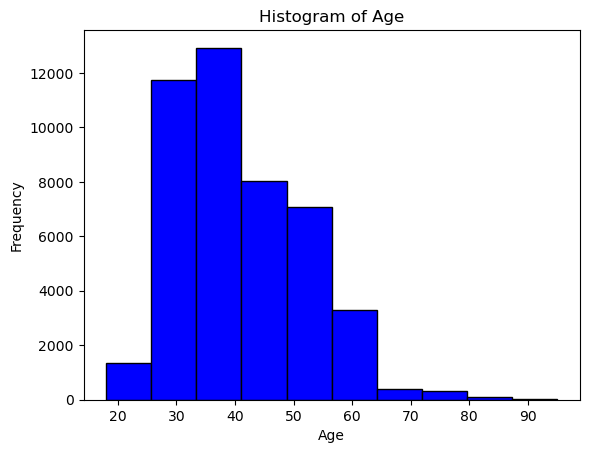

In [7]:
plt.hist(bank_data['age'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

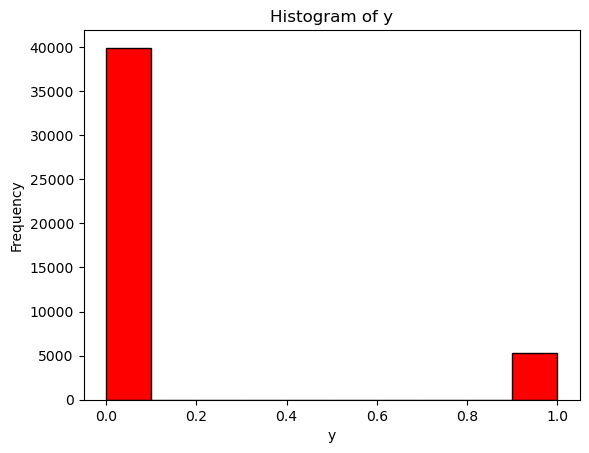

In [8]:
plt.hist(bank_data['y'], bins=10, color='red', edgecolor='black')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.title('Histogram of y')
plt.show()

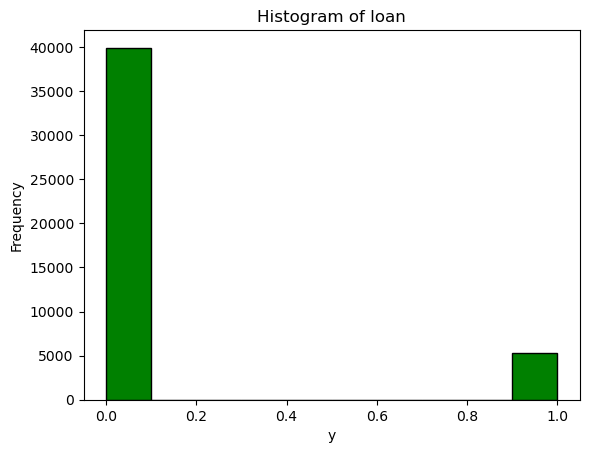

In [9]:
plt.hist(bank_data['y'], bins=10, color='green', edgecolor='black')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.title('Histogram of loan')
plt.show()

y, which indicates if the person has subscribed a term deposit is the target variable.

Now, I will make the required dataframes.

In [7]:
X = bank_data.drop(['y'], axis = 1)
y = bank_data['y']

In [8]:
#Making train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

K-NEAREST NEIGHBORS 

In [12]:
K_values = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
KNN_accuracy = []
keepdims = False
for k in K_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    
    y_pred = knn_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    KNN_accuracy.append(accuracy)
    print(f"Accuracy for k = {k:.0f}: {accuracy:.5f}")

Accuracy for k = 3: 0.87150
Accuracy for k = 4: 0.87891
Accuracy for k = 5: 0.87637
Accuracy for k = 6: 0.88134
Accuracy for k = 7: 0.87935
Accuracy for k = 8: 0.88068
Accuracy for k = 9: 0.88035
Accuracy for k = 10: 0.88112
Accuracy for k = 11: 0.88046
Accuracy for k = 12: 0.88201
Accuracy for k = 13: 0.88311
Accuracy for k = 14: 0.88289
Accuracy for k = 15: 0.88345
Accuracy for k = 16: 0.88267
Accuracy for k = 17: 0.88389
Accuracy for k = 18: 0.88267
Accuracy for k = 19: 0.88190
Accuracy for k = 20: 0.88267


Text(0, 0.5, 'Accuracy')

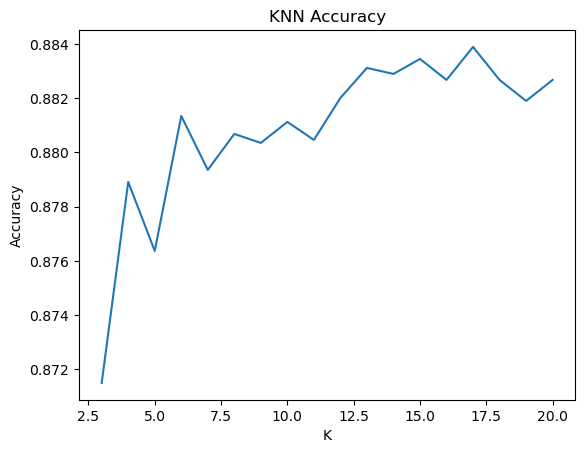

In [13]:
plt.plot(K_values, KNN_accuracy)
plt.title("KNN Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")

Accuracy for KNN increases with increase in K and peaks at k = 17.

LOGISTIC REGRESSION

In [14]:
logreg_model = LogisticRegression(random_state=42, max_iter = 10000000)
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for logistic regression: {accuracy:.5f}")

Accuracy for logistic regression: 0.88588


DECISION TREES

In [15]:
depths = []
DT_accuracy = []
for max_depth in range(1, 20):
    depths.append(max_depth)
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_model.fit(X_train, y_train)
    
    y_pred = dt_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    DT_accuracy.append(accuracy)
    print(f"Max Depth: {max_depth}, Accuracy: {accuracy:.5f}")

Max Depth: 1, Accuracy: 0.87935
Max Depth: 2, Accuracy: 0.88510
Max Depth: 3, Accuracy: 0.88588
Max Depth: 4, Accuracy: 0.88765
Max Depth: 5, Accuracy: 0.89351
Max Depth: 6, Accuracy: 0.89461
Max Depth: 7, Accuracy: 0.89285
Max Depth: 8, Accuracy: 0.89450
Max Depth: 9, Accuracy: 0.89329
Max Depth: 10, Accuracy: 0.89174
Max Depth: 11, Accuracy: 0.89108
Max Depth: 12, Accuracy: 0.89052
Max Depth: 13, Accuracy: 0.88831
Max Depth: 14, Accuracy: 0.89030
Max Depth: 15, Accuracy: 0.88931
Max Depth: 16, Accuracy: 0.88123
Max Depth: 17, Accuracy: 0.88256
Max Depth: 18, Accuracy: 0.87946
Max Depth: 19, Accuracy: 0.87880


Text(0, 0.5, 'Accuracy')

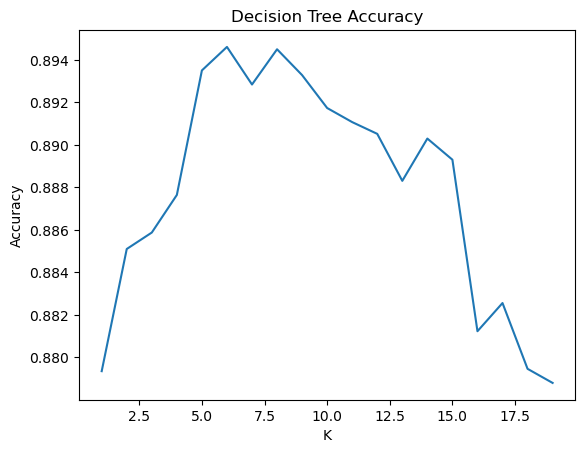

In [16]:
plt.plot(depths, DT_accuracy)
plt.title("Decision Tree Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")

The highest accuracy is when max depth is 6.

SUPPORT VECTOR MACHINES

Starting off with a linear SVM

In [9]:
C_values = [0.001, 0.01, 0.1, 1, 5, 10, 100]

In [10]:
from sklearn.svm import LinearSVC

SVM_accuracies = []
for C1 in C_values:
    linear_svm_model = LinearSVC(C = C1, max_iter = 30000)
    linear_svm_model.fit(X_train, y_train)
    y_pred = linear_svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    SVM_accuracies.append(accuracy)
    print(f"Accuracy for C = {C1}: {accuracy:.5f}")

Accuracy for C = 0.001: 0.88522
Accuracy for C = 0.01: 0.87969
Accuracy for C = 0.1: 0.74610
Accuracy for C = 1: 0.88201
Accuracy for C = 5: 0.87836
Accuracy for C = 10: 0.88134
Accuracy for C = 100: 0.51896


Text(0, 0.5, 'Accuracy')

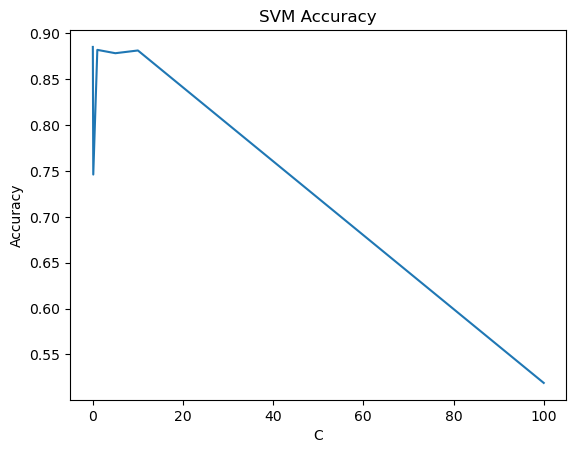

In [11]:
plt.plot(C_values, SVM_accuracies)
plt.title("SVM Accuracy")
plt.xlabel("C")
plt.ylabel("Accuracy")

RESULTS

Overall, Decision Trees had the highest accuracy rate for the test data out of all the algorithms.
SVMs on the other hand had the lowest accuracy rate for the test data.